In [2]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

<Figure size 1080x648 with 0 Axes>

In [3]:
today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)

2019-06-20


In [5]:
SEC = web.DataReader("207940", startday, yesterday)
#SEC = web.get_data_yahoo("005930.KS", startday, yesterday)
print(SEC.tail())

              Open    High     Low   Close  Volume    Change
Date                                                        
2019-06-14  316500  316500  312000  313000   67881 -0.011058
2019-06-17  311500  314000  308000  309000   36986 -0.012780
2019-06-18  309500  316000  309500  314000   68834  0.016181
2019-06-19  316000  318000  313000  315000   51459  0.003185
2019-06-20  315500  317500  315000  317000   46507  0.006349


              Open    High     Low   Close  Volume    Change
Date                                                        
2019-06-14  316500  316500  312000  313000   67881 -0.011058
2019-06-17  311500  314000  308000  309000   36986 -0.012780
2019-06-18  309500  316000  309500  314000   68834  0.016181
2019-06-19  316000  318000  313000  315000   51459  0.003185
2019-06-20  315500  317500  315000  317000   46507  0.006349


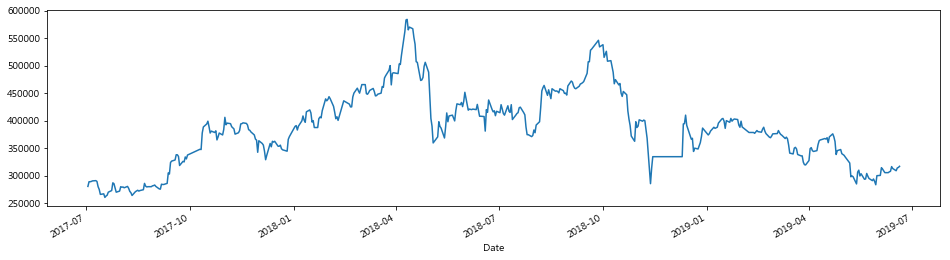

In [4]:
SEC['Close'].plot(figsize=(16,4))
plt.show()

In [9]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
import numpy as np 

%matplotlib inline
plt.figure(figsize=(15,9))
today = date.today()
startday = date(2018,4,1)
endday = date(2018,6,27)
SEC = web.DataReader("207940", startday, endday)
SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

Date
2018-04-02    486000
2018-04-03    485500
2018-04-04    503000
2018-04-05    502000
2018-04-06    519000
Name: Close, dtype: int64

<Figure size 1080x648 with 0 Axes>

In [11]:
# 1 씩 shift
SEC['Close'].shift(1).head()

Date
2018-04-02         NaN
2018-04-03    486000.0
2018-04-04    485500.0
2018-04-05    503000.0
2018-04-06    502000.0
Name: Close, dtype: float64

In [10]:
# 수익률 계산
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))
SEC.head()

,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2018-04-02,487000,490000,482500,486000,91013,-0.002053,NaN
2018-04-03,484000,489500,480000,485500,127515,-0.001029,-0.001029
2018-04-04,490000,505000,486000,503000,305367,0.036045,0.035411
2018-04-05,501000,505000,496500,502000,193001,-0.001988,-0.001990
2018-04-06,509000,534000,508000,519000,294164,0.033865,0.033304


In [15]:
import urllib.parse
import pandas as pd


In [16]:
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'


In [17]:
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue


In [12]:
def get_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}


In [18]:
def get_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        ## marketType 키 추가
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+" market key is exist")
    else:
        #params['searchType'] = 13
        print("invalid market")

    # make url  key=value & key = value
    params_string = urllib.parse.urlencode(params)
    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url, header=0)[0]
    df["종목코드"] = df.종목코드.apply(zeroFill)

    return df


In [19]:
stocks = get_stock_codes('kospi')
stocks.head(2)

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,005560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
